In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [5]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
# mat1=scipy.io.loadmat('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# # # nina_raw_valid=mat1['Valid_raw_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# # # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [7]:
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [8]:
file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 512
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 512
n_features = 10

In [10]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [11]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [12]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [13]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [14]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [17]:
df_Train = read_data_Train('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 5031936



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


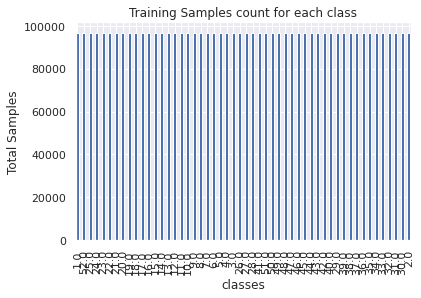

In [18]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [19]:
df_Test = read_data_Test('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2156544



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


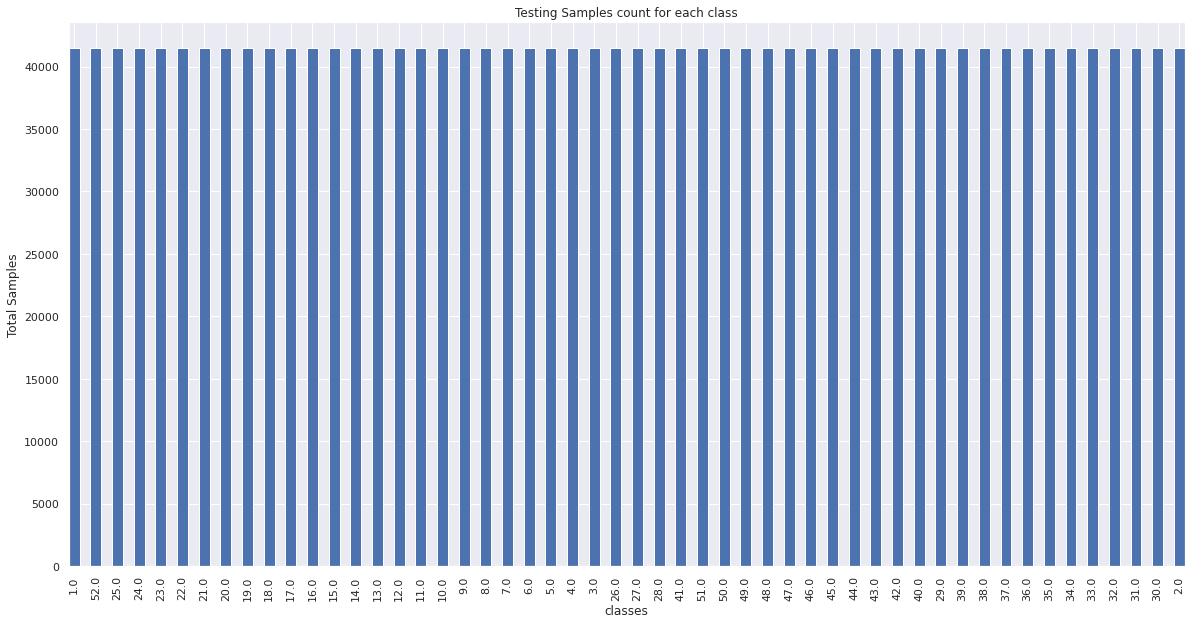

In [20]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [21]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000


In [22]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [23]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [24]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.67229,-0.63485,-0.51161,-0.43213,-0.36882,-0.45281,-0.75398,-0.90170,-0.51352,-0.77192,1.00000
1,-0.66990,-0.63485,-0.51198,-0.43213,-0.36879,-0.45280,-0.75392,-0.90043,-0.51352,-0.77191,1.00000
2,-0.66759,-0.63485,-0.51234,-0.43212,-0.36875,-0.45280,-0.75384,-0.89918,-0.51352,-0.77190,1.00000
3,-0.66546,-0.63484,-0.51268,-0.43212,-0.36871,-0.45280,-0.75376,-0.89799,-0.51352,-0.77189,1.00000
4,-0.66362,-0.63483,-0.51299,-0.43211,-0.36867,-0.45279,-0.75369,-0.89691,-0.51351,-0.77188,1.00000


In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03176,0.00247,0.00244,0.00240,0.00244,0.00240,0.00258,0.03562,0.00244,0.00241,1.00000
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000


In [26]:
df_Test.iloc[:,0:n_features]=scaler.transform(df_Test.iloc[:,0:n_features])

In [27]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.62181,-0.63470,-0.51795,-0.43219,-0.36893,-0.45286,-0.75480,-0.86372,-0.51346,-0.77206,1.00000
1,-0.62121,-0.63469,-0.51792,-0.43219,-0.36881,-0.45286,-0.75479,-0.86364,-0.51345,-0.77206,1.00000
2,-0.62061,-0.63468,-0.51790,-0.43219,-0.36872,-0.45286,-0.75477,-0.86358,-0.51345,-0.77206,1.00000
3,-0.62006,-0.63467,-0.51789,-0.43219,-0.36867,-0.45286,-0.75476,-0.86357,-0.51344,-0.77205,1.00000
4,-0.61957,-0.63465,-0.51789,-0.43219,-0.36865,-0.45286,-0.75474,-0.86364,-0.51344,-0.77205,1.00000


In [28]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.67229 -0.63485 -0.51161 -0.43213 -0.36882 -0.45281 -0.75398   
1       -0.66990 -0.63485 -0.51198 -0.43213 -0.36879 -0.45280 -0.75392   
2       -0.66759 -0.63485 -0.51234 -0.43212 -0.36875 -0.45280 -0.75384   
3       -0.66546 -0.63484 -0.51268 -0.43212 -0.36871 -0.45280 -0.75376   
4       -0.66362 -0.63483 -0.51299 -0.43211 -0.36867 -0.45279 -0.75369   
...          ...      ...      ...      ...      ...      ...      ...   
5031931 -0.67906 -0.63424 -0.51714 -0.43021 -0.35403  0.13654  0.12757   
5031932 -0.67903 -0.63426 -0.51716 -0.43025 -0.35431  0.13208  0.11671   
5031933 -0.67898 -0.63427 -0.51718 -0.43028 -0.35465  0.12755  0.10702   
5031934 -0.67894 -0.63427 -0.51719 -0.43031 -0.35495  0.12339  0.09885   
5031935 -0.67890 -0.63428 -0.51720 -0.43032 -0.35514  0.11980  0.09225   

              C8       C9      C10  Class_label  ActivityEncoded  
0       -0.90170 -0.51352 -0.7

In [29]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [30]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (9827, 512, 10)
9827 training samples
y_train shape:  (9827,)
512
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (512, 10)
input_shape: (512, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (9827, 52)


In [31]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (4211, 512, 10)
4211 testing samples
y_test shape:  (4211,)


In [32]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_length = 512
n_depth=10
x_train = x_train.reshape(x_train.shape[0], n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (9827, 512, 10)
x_test shape:  (4211, 512, 10)
n_outputs 52


In [33]:
verbose, epochs, batch_size = 0, 500, 16

In [34]:
input_shape= n_length, n_depth

In [35]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04), \
                           input_shape=input_shape))
model.add(MaxPooling1D(pool_size=8,strides=2))
model.add(Activation('tanh'))
model.add(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Activation('relu'))
model.add(Flatten())
# model.add(Bidirectional(LSTM(200,input_shape=input_shape,return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [36]:
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# model.build(input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 256, 64)           5824      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 64)           0         
_________________________________________________________________
activation (Activation)      (None, 125, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 63, 64)            20544     
_________________________________________________________________
activation_1 (Activation)    (None, 63, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 64)            2

In [37]:
# tf.keras.utils.plot_model(model, to_file='/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [38]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [39]:
csv_logger = CSVLogger('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/BiLSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
615/615 [==============================] - ETA: 0s - loss: 4.6031 - accuracy: 0.0600
Epoch 00001: val_accuracy improved from -inf to 0.22750, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 15s 24ms/step - loss: 4.6031 - accuracy: 0.0600 - val_loss: 3.3986 - val_accuracy: 0.2275
Epoch 2/500
614/615 [============================>.] - ETA: 0s - loss: 3.9235 - accuracy: 0.1407
Epoch 00002: val_accuracy improved from 0.22750 to 0.33128, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 9ms/step - loss: 3.9231 - accuracy: 0.1407 - val_loss: 2.9502 - val_accuracy: 0.3313
Epoch 3/500
609/615 [============================>.] - ETA: 0s - loss: 3.5225 - accuracy: 0.2072
Epoch 00003: val_accuracy improved from 0.33128 to 0.39563, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
6

Epoch 24/500
615/615 [==============================] - ETA: 0s - loss: 1.9965 - accuracy: 0.5273
Epoch 00024: val_accuracy improved from 0.69936 to 0.70435, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 8ms/step - loss: 1.9965 - accuracy: 0.5273 - val_loss: 1.4066 - val_accuracy: 0.7043
Epoch 25/500
615/615 [==============================] - ETA: 0s - loss: 1.9643 - accuracy: 0.5384
Epoch 00025: val_accuracy improved from 0.70435 to 0.70886, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 8ms/step - loss: 1.9643 - accuracy: 0.5384 - val_loss: 1.4110 - val_accuracy: 0.7089
Epoch 26/500
609/615 [============================>.] - ETA: 0s - loss: 1.9452 - accuracy: 0.5493
Epoch 00026: val_accuracy improved from 0.70886 to 0.72263, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hd

Epoch 48/500
613/615 [============================>.] - ETA: 0s - loss: 1.6130 - accuracy: 0.6312
Epoch 00048: val_accuracy improved from 0.77583 to 0.77678, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 7s 12ms/step - loss: 1.6141 - accuracy: 0.6307 - val_loss: 1.1285 - val_accuracy: 0.7768
Epoch 49/500
610/615 [============================>.] - ETA: 0s - loss: 1.6018 - accuracy: 0.6322
Epoch 00049: val_accuracy did not improve from 0.77678
615/615 [==============================] - 6s 10ms/step - loss: 1.6013 - accuracy: 0.6324 - val_loss: 1.1427 - val_accuracy: 0.7749
Epoch 50/500
612/615 [============================>.] - ETA: 0s - loss: 1.6165 - accuracy: 0.6244
Epoch 00050: val_accuracy improved from 0.77678 to 0.77915, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 7s 12ms/step - loss: 1.6164 - accuracy: 0.6244

Epoch 73/500
607/615 [============================>.] - ETA: 0s - loss: 1.3377 - accuracy: 0.6973
Epoch 00073: val_accuracy improved from 0.82522 to 0.82831, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 8ms/step - loss: 1.3357 - accuracy: 0.6985 - val_loss: 0.9454 - val_accuracy: 0.8283
Epoch 74/500
609/615 [============================>.] - ETA: 0s - loss: 1.2929 - accuracy: 0.7080
Epoch 00074: val_accuracy did not improve from 0.82831
615/615 [==============================] - 5s 8ms/step - loss: 1.2929 - accuracy: 0.7079 - val_loss: 0.9541 - val_accuracy: 0.8228
Epoch 75/500
609/615 [============================>.] - ETA: 0s - loss: 1.3071 - accuracy: 0.7087
Epoch 00075: val_accuracy improved from 0.82831 to 0.82878, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 9ms/step - loss: 1.3078 - accuracy: 0.7086 - 

Epoch 98/500
614/615 [============================>.] - ETA: 0s - loss: 1.0701 - accuracy: 0.7691
Epoch 00098: val_accuracy did not improve from 0.85775
615/615 [==============================] - 5s 8ms/step - loss: 1.0705 - accuracy: 0.7691 - val_loss: 0.8054 - val_accuracy: 0.8573
Epoch 99/500
613/615 [============================>.] - ETA: 0s - loss: 1.0855 - accuracy: 0.7614
Epoch 00099: val_accuracy did not improve from 0.85775
615/615 [==============================] - 5s 9ms/step - loss: 1.0866 - accuracy: 0.7610 - val_loss: 0.8056 - val_accuracy: 0.8535
Epoch 100/500
608/615 [============================>.] - ETA: 0s - loss: 1.0644 - accuracy: 0.7657
Epoch 00100: val_accuracy did not improve from 0.85775
615/615 [==============================] - 5s 8ms/step - loss: 1.0649 - accuracy: 0.7655 - val_loss: 0.7948 - val_accuracy: 0.8566
Epoch 101/500
607/615 [============================>.] - ETA: 0s - loss: 1.0677 - accuracy: 0.7644
Epoch 00101: val_accuracy improved from 0.85775 

Epoch 124/500
611/615 [============================>.] - ETA: 0s - loss: 0.9059 - accuracy: 0.8077
Epoch 00124: val_accuracy did not improve from 0.88079
615/615 [==============================] - 5s 8ms/step - loss: 0.9061 - accuracy: 0.8077 - val_loss: 0.7079 - val_accuracy: 0.8744
Epoch 125/500
608/615 [============================>.] - ETA: 0s - loss: 0.8968 - accuracy: 0.8128
Epoch 00125: val_accuracy did not improve from 0.88079
615/615 [==============================] - 5s 8ms/step - loss: 0.8974 - accuracy: 0.8131 - val_loss: 0.6984 - val_accuracy: 0.8749
Epoch 126/500
608/615 [============================>.] - ETA: 0s - loss: 0.8911 - accuracy: 0.8115
Epoch 00126: val_accuracy did not improve from 0.88079
615/615 [==============================] - 6s 10ms/step - loss: 0.8930 - accuracy: 0.8111 - val_loss: 0.6970 - val_accuracy: 0.8744
Epoch 127/500
611/615 [============================>.] - ETA: 0s - loss: 0.8794 - accuracy: 0.8155
Epoch 00127: val_accuracy did not improve fro

Epoch 150/500
614/615 [============================>.] - ETA: 0s - loss: 0.7581 - accuracy: 0.8513
Epoch 00150: val_accuracy did not improve from 0.89765
615/615 [==============================] - 5s 8ms/step - loss: 0.7580 - accuracy: 0.8513 - val_loss: 0.6152 - val_accuracy: 0.8969
Epoch 151/500
611/615 [============================>.] - ETA: 0s - loss: 0.7404 - accuracy: 0.8540
Epoch 00151: val_accuracy did not improve from 0.89765
615/615 [==============================] - 5s 8ms/step - loss: 0.7416 - accuracy: 0.8535 - val_loss: 0.6208 - val_accuracy: 0.8957
Epoch 152/500
613/615 [============================>.] - ETA: 0s - loss: 0.7381 - accuracy: 0.8573
Epoch 00152: val_accuracy did not improve from 0.89765
615/615 [==============================] - 5s 8ms/step - loss: 0.7386 - accuracy: 0.8569 - val_loss: 0.6191 - val_accuracy: 0.8955
Epoch 153/500
609/615 [============================>.] - ETA: 0s - loss: 0.7485 - accuracy: 0.8500
Epoch 00153: val_accuracy did not improve from

610/615 [============================>.] - ETA: 0s - loss: 0.6470 - accuracy: 0.8747
Epoch 00178: val_accuracy improved from 0.90335 to 0.90454, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 8ms/step - loss: 0.6464 - accuracy: 0.8751 - val_loss: 0.5774 - val_accuracy: 0.9045
Epoch 179/500
608/615 [============================>.] - ETA: 0s - loss: 0.6491 - accuracy: 0.8783
Epoch 00179: val_accuracy improved from 0.90454 to 0.90525, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 [==============================] - 5s 8ms/step - loss: 0.6506 - accuracy: 0.8777 - val_loss: 0.5716 - val_accuracy: 0.9052
Epoch 180/500
615/615 [==============================] - ETA: 0s - loss: 0.6476 - accuracy: 0.8772
Epoch 00180: val_accuracy improved from 0.90525 to 0.90572, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/checkpoint.hdf5
615/615 

Epoch 205/500
609/615 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.9008
Epoch 00205: val_accuracy did not improve from 0.91000
615/615 [==============================] - 5s 8ms/step - loss: 0.5615 - accuracy: 0.9008 - val_loss: 0.5416 - val_accuracy: 0.9060
Epoch 206/500
609/615 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.9000
Epoch 00206: val_accuracy did not improve from 0.91000
615/615 [==============================] - 5s 8ms/step - loss: 0.5557 - accuracy: 0.9001 - val_loss: 0.5428 - val_accuracy: 0.9043
Epoch 207/500
607/615 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.9051
Epoch 00207: val_accuracy did not improve from 0.91000
615/615 [==============================] - 5s 8ms/step - loss: 0.5496 - accuracy: 0.9052 - val_loss: 0.5407 - val_accuracy: 0.9043
Epoch 208/500
612/615 [============================>.] - ETA: 0s - loss: 0.5720 - accuracy: 0.8893
Epoch 00208: val_accuracy did not improve from

Epoch 233/500
607/615 [============================>.] - ETA: 0s - loss: 0.5016 - accuracy: 0.9142
Epoch 00233: val_accuracy did not improve from 0.91380
615/615 [==============================] - 5s 8ms/step - loss: 0.5014 - accuracy: 0.9145 - val_loss: 0.5206 - val_accuracy: 0.9088
Epoch 234/500
607/615 [============================>.] - ETA: 0s - loss: 0.5013 - accuracy: 0.9096
Epoch 00234: val_accuracy did not improve from 0.91380
615/615 [==============================] - 5s 9ms/step - loss: 0.5018 - accuracy: 0.9094 - val_loss: 0.5155 - val_accuracy: 0.9081
Epoch 235/500
608/615 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.9105
Epoch 00235: val_accuracy did not improve from 0.91380
615/615 [==============================] - 6s 9ms/step - loss: 0.5016 - accuracy: 0.9109 - val_loss: 0.5153 - val_accuracy: 0.9093
Epoch 236/500
607/615 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.9100
Epoch 00236: val_accuracy did not improve from

Epoch 261/500
608/615 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.9209
Epoch 00261: val_accuracy did not improve from 0.91665
615/615 [==============================] - 5s 8ms/step - loss: 0.4549 - accuracy: 0.9213 - val_loss: 0.4929 - val_accuracy: 0.9147
Epoch 262/500
608/615 [============================>.] - ETA: 0s - loss: 0.4533 - accuracy: 0.9227
Epoch 00262: val_accuracy did not improve from 0.91665
615/615 [==============================] - 5s 8ms/step - loss: 0.4538 - accuracy: 0.9225 - val_loss: 0.4858 - val_accuracy: 0.9159
Epoch 263/500
611/615 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.9221
Epoch 00263: val_accuracy did not improve from 0.91665
615/615 [==============================] - 5s 8ms/step - loss: 0.4624 - accuracy: 0.9223 - val_loss: 0.5048 - val_accuracy: 0.9083
Epoch 264/500
608/615 [============================>.] - ETA: 0s - loss: 0.4541 - accuracy: 0.9229
Epoch 00264: val_accuracy did not improve from

612/615 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.9232
Epoch 00289: val_accuracy did not improve from 0.91973
615/615 [==============================] - 6s 9ms/step - loss: 0.4364 - accuracy: 0.9230 - val_loss: 0.4820 - val_accuracy: 0.9190
Epoch 290/500
613/615 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.9266
Epoch 00290: val_accuracy did not improve from 0.91973
615/615 [==============================] - 6s 10ms/step - loss: 0.4263 - accuracy: 0.9267 - val_loss: 0.4744 - val_accuracy: 0.9181
Epoch 291/500
615/615 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.9292
Epoch 00291: val_accuracy did not improve from 0.91973
615/615 [==============================] - 7s 12ms/step - loss: 0.4195 - accuracy: 0.9292 - val_loss: 0.4799 - val_accuracy: 0.9119
Epoch 292/500
609/615 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.9337
Epoch 00292: val_accuracy did not improve from 0.91973
615

Epoch 318/500
612/615 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.9347
Epoch 00318: val_accuracy did not improve from 0.91997
615/615 [==============================] - 5s 8ms/step - loss: 0.3871 - accuracy: 0.9347 - val_loss: 0.4601 - val_accuracy: 0.9195
Epoch 319/500
612/615 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.9313
Epoch 00319: val_accuracy did not improve from 0.91997
615/615 [==============================] - 5s 8ms/step - loss: 0.3936 - accuracy: 0.9310 - val_loss: 0.4618 - val_accuracy: 0.9197
Epoch 320/500
612/615 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.9330
Epoch 00320: val_accuracy did not improve from 0.91997
615/615 [==============================] - 5s 8ms/step - loss: 0.4003 - accuracy: 0.9332 - val_loss: 0.4707 - val_accuracy: 0.9181
Epoch 321/500
614/615 [============================>.] - ETA: 0s - loss: 0.3809 - accuracy: 0.9378
Epoch 00321: val_accuracy improved from 0.9199

Epoch 347/500
608/615 [============================>.] - ETA: 0s - loss: 0.3627 - accuracy: 0.9432
Epoch 00347: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3637 - accuracy: 0.9429 - val_loss: 0.4564 - val_accuracy: 0.9164
Epoch 348/500
609/615 [============================>.] - ETA: 0s - loss: 0.3661 - accuracy: 0.9401
Epoch 00348: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3657 - accuracy: 0.9403 - val_loss: 0.4539 - val_accuracy: 0.9171
Epoch 349/500
611/615 [============================>.] - ETA: 0s - loss: 0.3533 - accuracy: 0.9436
Epoch 00349: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3543 - accuracy: 0.9433 - val_loss: 0.4579 - val_accuracy: 0.9174
Epoch 350/500
607/615 [============================>.] - ETA: 0s - loss: 0.3707 - accuracy: 0.9388
Epoch 00350: val_accuracy did not improve from

Epoch 376/500
615/615 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.9442
Epoch 00376: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3423 - accuracy: 0.9442 - val_loss: 0.4435 - val_accuracy: 0.9166
Epoch 377/500
609/615 [============================>.] - ETA: 0s - loss: 0.3350 - accuracy: 0.9455
Epoch 00377: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3358 - accuracy: 0.9456 - val_loss: 0.4433 - val_accuracy: 0.9169
Epoch 378/500
611/615 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.9477
Epoch 00378: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3363 - accuracy: 0.9479 - val_loss: 0.4401 - val_accuracy: 0.9181
Epoch 379/500
609/615 [============================>.] - ETA: 0s - loss: 0.3427 - accuracy: 0.9460
Epoch 00379: val_accuracy did not improve from

Epoch 405/500
613/615 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.9444
Epoch 00405: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3339 - accuracy: 0.9443 - val_loss: 0.4411 - val_accuracy: 0.9204
Epoch 406/500
613/615 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.9490
Epoch 00406: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3246 - accuracy: 0.9489 - val_loss: 0.4487 - val_accuracy: 0.9200
Epoch 407/500
615/615 [==============================] - ETA: 0s - loss: 0.3376 - accuracy: 0.9427
Epoch 00407: val_accuracy did not improve from 0.92377
615/615 [==============================] - 5s 8ms/step - loss: 0.3376 - accuracy: 0.9427 - val_loss: 0.4428 - val_accuracy: 0.9162
Epoch 408/500
610/615 [============================>.] - ETA: 0s - loss: 0.3250 - accuracy: 0.9474
Epoch 00408: val_accuracy did not improve from

In [40]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 321
train accuracy and validation accuracy 0.9377226233482361 0.92377108335495


In [41]:
model.save('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN512X10/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy


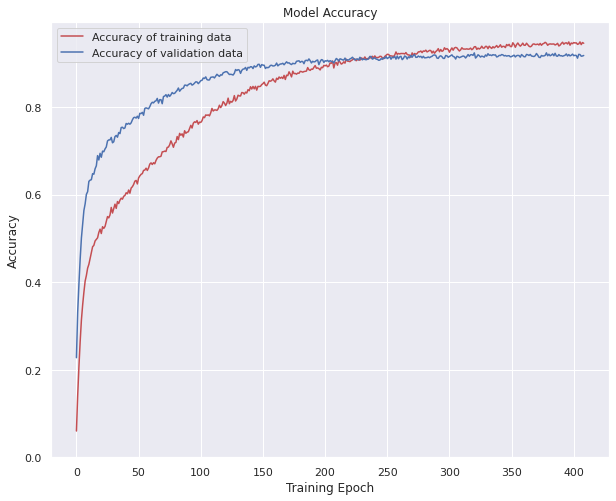

In [42]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


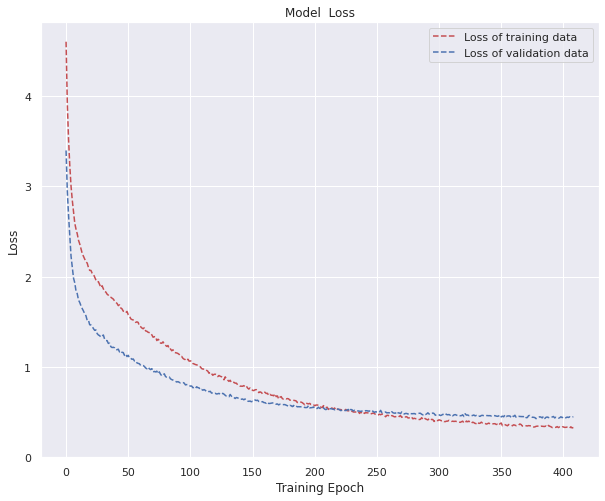

In [43]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [44]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

264/264 [==============================] - 1s 5ms/step - loss: 0.4513 - accuracy: 0.9238
test_accuracy 0.92377108335495


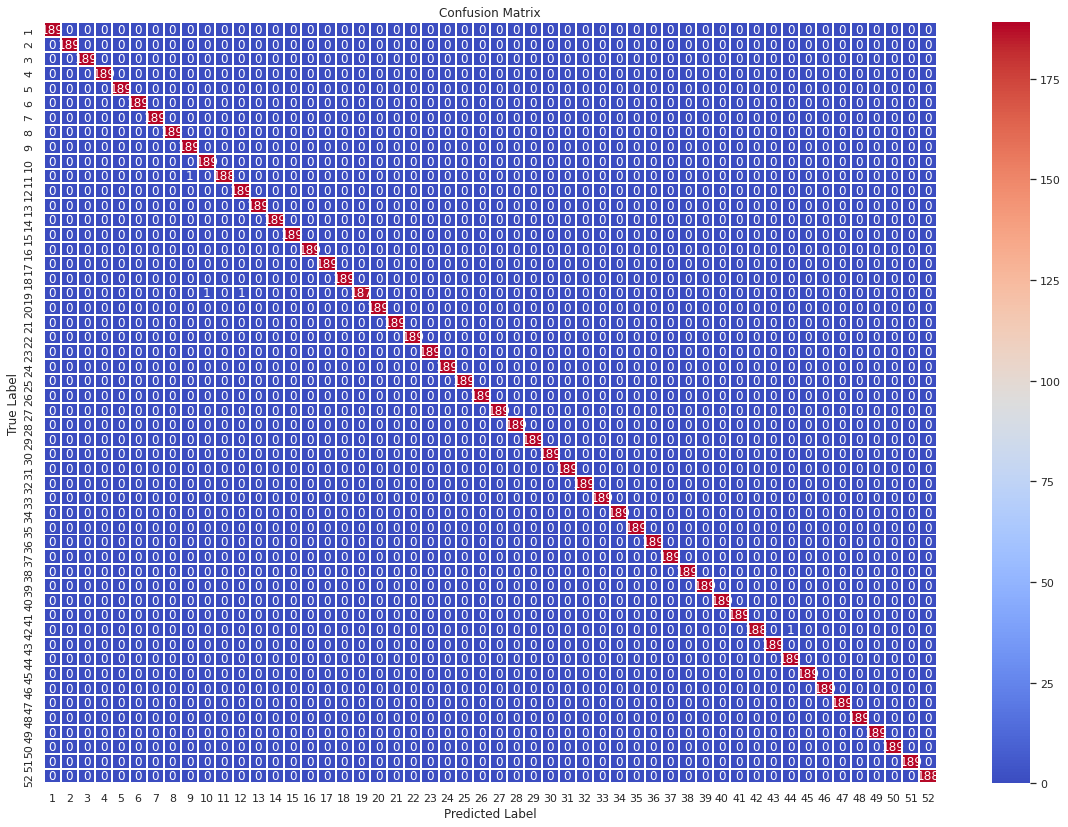

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       189
           5       1.00      1.00      1.00       189
           6       1.00      1.00      1.00       189
           7       1.00      1.00      1.00       189
           8       0.99      1.00      1.00       189
           9       0.99      1.00      1.00       189
          10       1.00      0.99      1.00       189
          11       0.99      1.00      1.00       189
          12       1.00      1.00      1.00       189
          13       1.00      1.00      1.00       189
          14       1.00      1.00      1.00       189
          15       1.00      1.00      1.00       189
          16       1.00      1.00      1.00       189
          17       1.00    

In [45]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

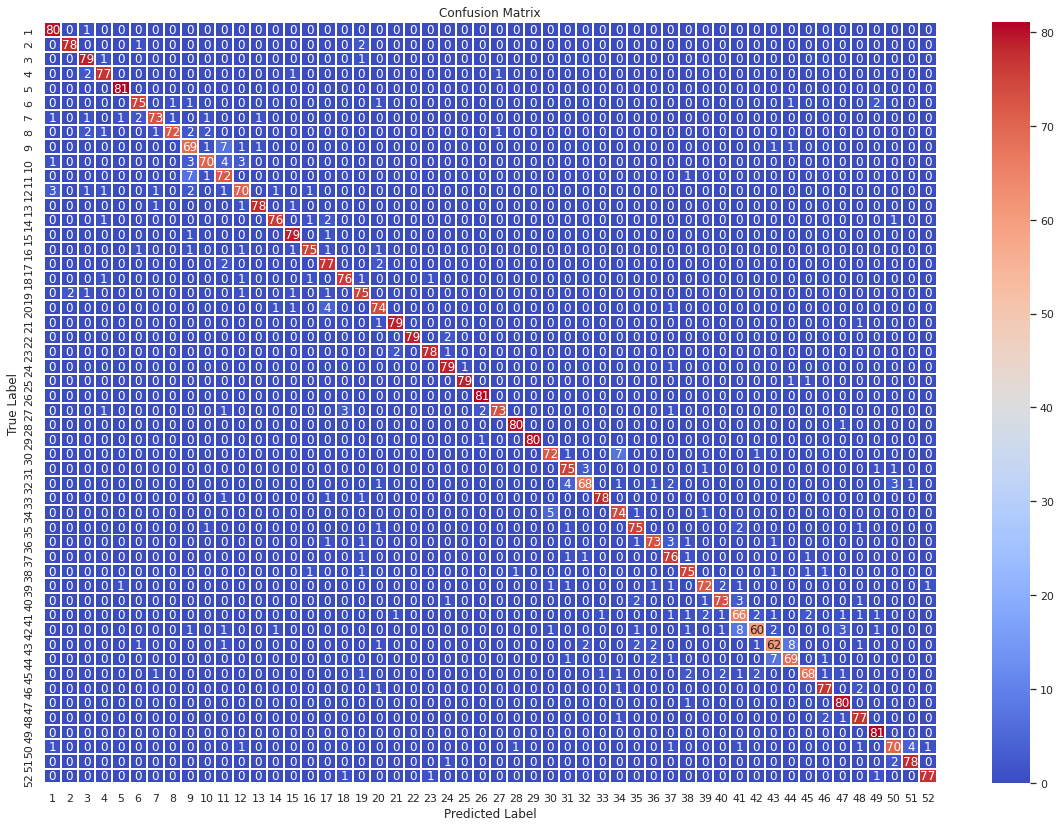

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        81
           1       0.97      0.96      0.97        81
           2       0.91      0.98      0.94        81
           3       0.93      0.95      0.94        81
           4       0.98      1.00      0.99        81
           5       0.94      0.93      0.93        81
           6       0.95      0.90      0.92        81
           7       0.97      0.89      0.93        81
           8       0.79      0.85      0.82        81
           9       0.92      0.86      0.89        81
          10       0.80      0.89      0.84        81
          11       0.89      0.86      0.87        81
          12       0.97      0.96      0.97        81
          13       0.96      0.94      0.95        81
          14       0.94      0.98      0.96        81
          15       0.95      0.93      0.94        81
          16       0.88      0.95      0.91        81
          17       0.95    

In [46]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))